Coefficients: 
 [ 0.00649984  0.78839318 -0.52187123  0.68893903 -0.96196082]
Mean squared error: 1.92
Coefficient of determination: 0.03
    Actual value  Predicted value  Difference
0              1         3.389813   -2.389813
1              5         3.813947    1.186053
2              5         3.616689    1.383311
3              4         3.802896    0.197104
4              4         3.836392    0.163608
5              4         3.811590    0.188410
6              2         3.862273   -1.862273
7              5         3.421486    1.578514
8              4         3.913154    0.086846
9              5         3.804347    1.195653
10             2         3.800993   -1.800993
11             5         3.810267    1.189733
12             5         3.774965    1.225035
13             4         3.841826    0.158174
14             4         3.937630    0.062370
15             1         3.891727   -2.891727
16             1         4.059810   -3.059810
17             5         3.675347 

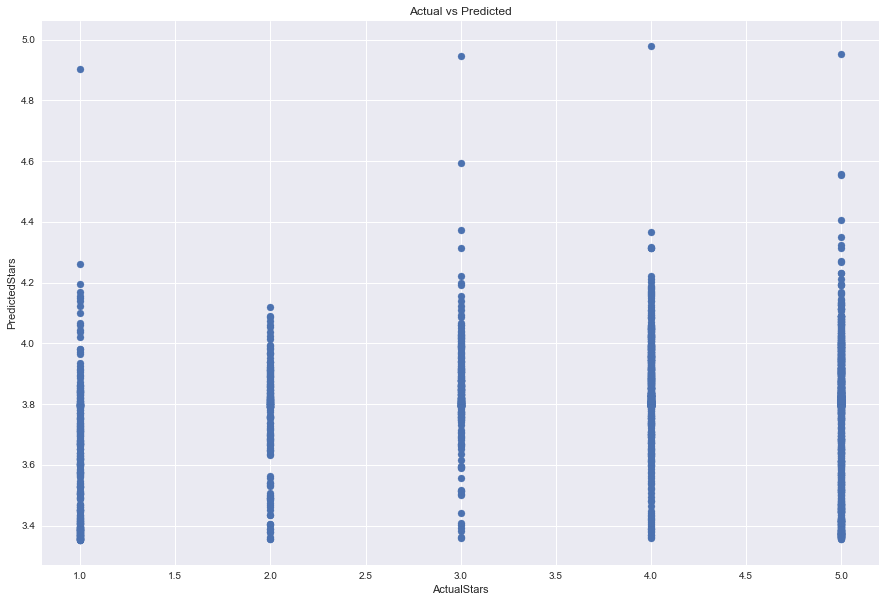

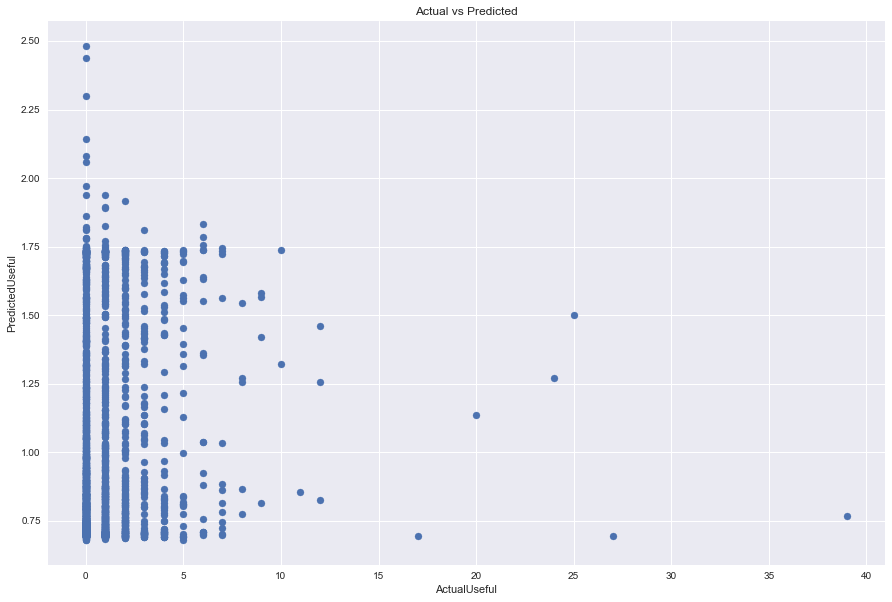

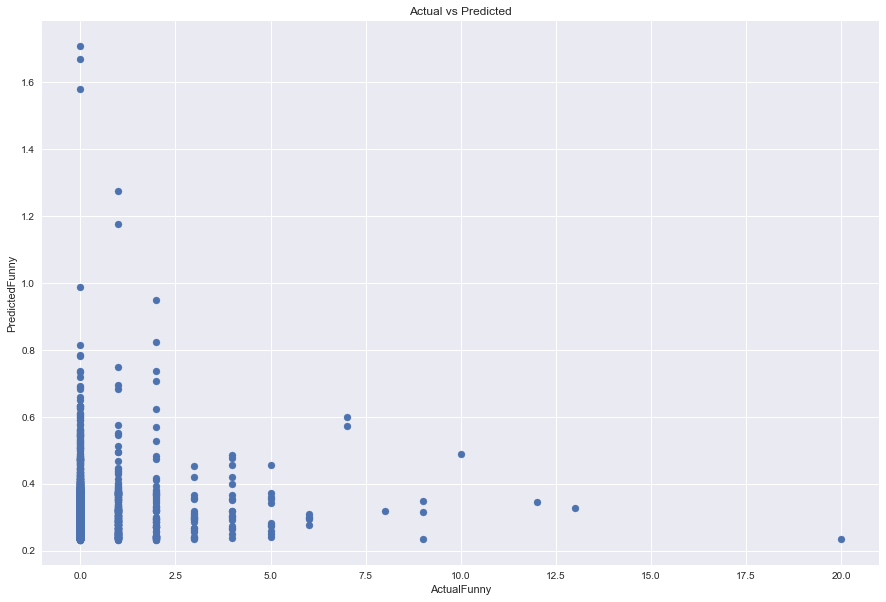

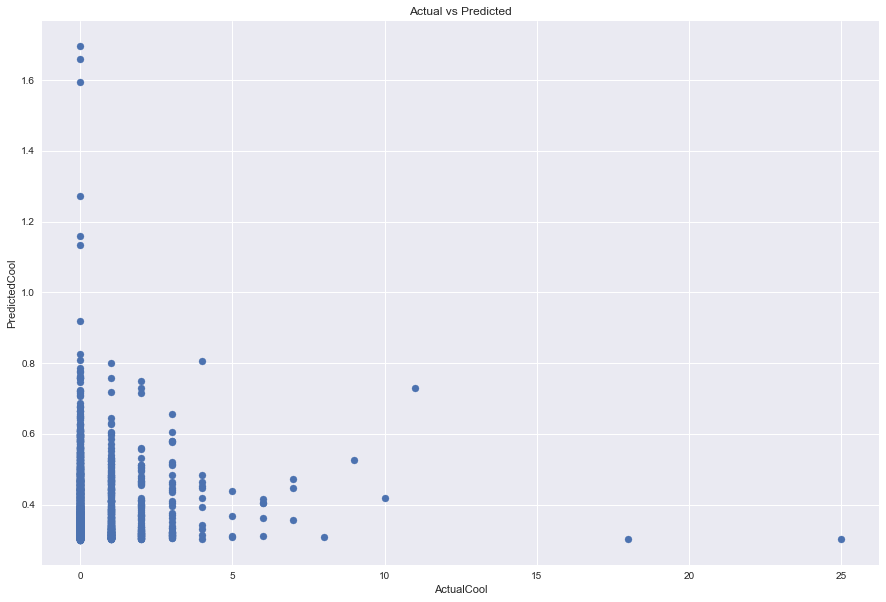

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def runLinReg(X, y, df, y_name, new_column_name):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    # The coefficients
    print('Coefficients: \n', reg.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

    visualizeResults(y_test, y_pred, y_name)


def visualizeResults(y_test, y_pred, y_name):
    # Now let's visualize how the estimated linear regression model performed by comparing predicted values to actual values
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual' + y_name)
    plt.ylabel('Predicted' + y_name)
    plt.title('Actual vs Predicted')

    # Finally let's compare predicted and actual values in dataframe
    pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
    print(pred_df.head(20))

# Dataset from the cluster model  
topicnized_df = pd.read_csv("DATA/prepared_data/topicnized_data.csv")

# X_values
x_topic_0 = topicnized_df['Topic0']
x_topic_1 = topicnized_df['Topic1']
x_topic_2 = topicnized_df['Topic2']
x_topic_3 = topicnized_df['Topic3']
x_topic_4 = topicnized_df['Topic4']

X = pd.concat([x_topic_0, x_topic_1, x_topic_2, x_topic_3, x_topic_4], axis=1)

# y_values
y_stars = np.array(topicnized_df['stars'])
y_useful = np.array(topicnized_df['useful'])
y_funny = np.array(topicnized_df['funny'])
y_cool = np.array(topicnized_df['cool'])

# Predicting each of the y-values and visualizing
runLinReg(X, y_stars, topicnized_df, "Stars", "predictedStars")
runLinReg(X, y_useful, topicnized_df, "Useful", "predictedUseful")
runLinReg(X, y_funny, topicnized_df, "Funny", "predictedFunny")
runLinReg(X, y_cool, topicnized_df, "Cool", "predictedCool")
